In [513]:
import pandas as pd
import numpy as np
# from scipy.stats import pearsonr, median_abs_deviation
# from sklearn import metrics
import sys
import os
from statsmodels.stats.multitest import multipletests
from scipy.stats import combine_pvalues, norm, mannwhitneyu, spearmanr, pearsonr
from read_clustering.variant_call import VariantCalls
import matplotlib.pyplot as plt
from scipy.stats import shapiro, combine_pvalues
import seaborn as sns
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from scipy.stats import combine_pvalues, norm, mannwhitneyu


In [555]:
pseduo_u_pos = [775, 959, 965, 985, 989, 1003, 1041, 1051, 1055, 1109, 1123,
                     2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
                     2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974, 105, 119, 210, 301, 465, 631, 758, 765,
                     998, 1180, 1186,
                     1289, 1414]
twoprimeo_pos = [648, 649, 662, 804, 806, 816, 866, 875, 897, 907, 1132,
                      1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
                      2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
                      2921, 2945, 2947, 2958, 27, 99, 413, 419, 435, 540, 561, 577, 618, 795, 973,
                      1006, 1125, 1268, 1270, 1427, 1571, 1638]


In [4]:
CBF5GAL = "modification_calls/20190610_R941_CBF5GAL.csv"
CBF5GLU = "modification_calls/20190611_R941_CBF5GLU.csv"
NOP58GAL = "modification_calls/20190617_R941_NOP58GAL.csv"
NOP58GLU = "modification_calls/20190619_R941_NOP58GLU.csv"
IVT = "modification_calls/20191014_R941_IVT.csv"
mutant448 = "modification_calls/20210405_R941_mutant448.csv"
WT_YPD = "modification_calls/20210410_R941_WT_YPD.csv"
WT_KOAC = "modification_calls/20210412_R941_WT_KOAC.csv"
mutant452 = "modification_calls/20210413_R941_mutant452.csv"
WT_CY = "modification_calls/20210414_R941_WT_CY.csv"
mutant451 = "modification_calls/20210415_R941_mutant451.csv"
WT_PB = "modification_calls/20210520_R941_WT_PB.csv"
WT_stationary = "modification_calls/20210521_R941_WT_stationary.csv"
Dbp3d_YPD = "modification_calls/20210527_R941_Dbp3d_YPD.csv"
trl1d_YPD = "modification_calls/20210528_R941_trl1d_YPD.csv"
WT_rapa5 = "modification_calls/20210531_R941_WT_rapa5.csv"
Mix = "modification_calls/20210618_R941_Mix.csv"
prp43 = "modification_calls/20210619_R941_prp43.csv"
MIX_2 = "modification_calls/20210716_R941_MIX.csv"
YS603_18_YEPD = "modification_calls/20210717_R941_YS603_18_YEPD.csv"
prp16_18deg_YPD = "modification_calls/20210719_R941_prp16_18deg_YPD.csv"
spp382_YPD = "modification_calls/20210720_R941_spp382_YPD.csv"
R941_YS602_18_YPD = "modification_calls/20210722_R941_R941_YS602_18_YPD.csv"
dbr1d_YPD = "modification_calls/20210729_R941_dbr1d_YPD.csv"
sqs1d_YPD = "modification_calls/20210730_R941_sqs1d_YPD.csv"
snR4d_YPD = "modification_calls/20210823_R941_snR4d_YPD.csv"
snR45d_YPD = "modification_calls/20210824_R941_snR45d_YPD.csv"
mutant448_2 = "modification_calls/20210825_R941_mutant448.csv"
snR4d_alpha_YPD = "modification_calls/20210902_R941_snR4d_alpha_YPD.csv"

In [220]:
# wt1 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA475631.csv"
# wt2 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA323588.csv"
wt3 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA814001.bc_4.csv"
wt4 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA345944.bc_1.csv"
# wt5 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA639991.bc_1.csv"
wt6 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA564572.bc_2.csv"
# wt7 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA873248.bc_1.csv"
# wt8 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA873248.bc_3.csv"
# wt9 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA235628.bc_1.csv"
wt10 = "/Users/andrewbailey/CLionProjects/rrna_analysis/final_calls/ivt_vs_wt/RNA524356.bc_1.csv"
# all_file_paths = [wt3, wt4, wt6, wt10] 
# all_labels = ["wt3", "wt4", "wt6", "wt10"]  
# all_file_paths = [wt3, wt4, wt6, wt10] 
# all_labels = ["wt3", "wt4", "wt6", "wt10"]  

all_file_paths = [mutant448, mutant448_2] 
all_labels = ["mutant448", "mutant448_2"]  
# all_file_paths = [snR4d_YPD, WT_YPD] 
# all_labels = ["snR4d_YPD", "WT_YPD"]  

# all_file_paths = [MIX_2, WT_YPD] 
# all_labels = ["MIX_2", "WT_YPD"]  

vc = VariantCalls(all_file_paths, all_labels, color_map="tab20")


mutant448_mutant448_2    0.172791
dtype: float64 mutant448_mutant448_2    1279
dtype: int64


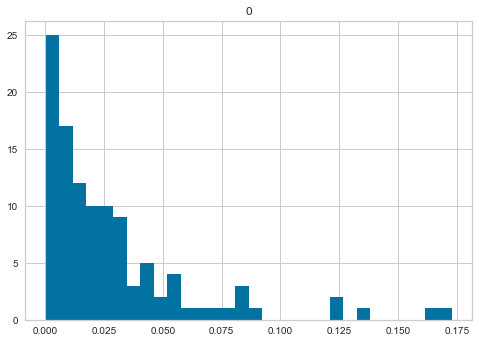

In [221]:
diff = {}
all_data = []
X_18 = vc.get_X("RDN18-1", vc.get_contig_positions("RDN18-1"))
X_25 = vc.get_X("RDN25-1", vc.get_contig_positions("RDN25-1"))

for i, label1 in enumerate(all_labels):
    for label2 in all_labels[1+i:]:
        percent_mod_18 = (X_18.xs(label1, level="label") >= 0.5).mean()
        percent_mod2_18 = (X_18.xs(label2, level="label") >= 0.5).mean()
        percent_mod_25 = (X_25.xs(label1, level="label") >= 0.5).mean()
        percent_mod2_25 = (X_25.xs(label2, level="label") >= 0.5).mean()
        comparison_df = pd.concat([percent_mod_18 - percent_mod2_18, 
                                   percent_mod_25 - percent_mod2_25])
        diff[f"{label1}_{label2}"] = comparison_df
    
        all_data.extend(list((comparison_df).values))

diff = pd.DataFrame(diff)
sorted_data = np.abs(pd.DataFrame(all_data)).sort_values(by=0)
sorted_data.hist(bins=30)
print(np.abs(diff).max(), np.abs(diff).idxmax())

In [236]:
diff

,mutant448_mutant448_2
reference_index,
27,-0.007934
99,0.014671
105,0.017697
119,0.082579
210,0.044728
...,...
2943,0.028175
2945,0.017490
2947,-0.036192


In [222]:
np.abs(diff.T).max().sort_values()

reference_index
795     0.000142
1780    0.000185
2869    0.000271
2257    0.000427
2255    0.001733
          ...   
866     0.124467
2287    0.126654
561     0.136652
1772    0.164502
1279    0.172791
Length: 110, dtype: float64

In [223]:
contig = "RDN25-1"
X = vc.get_X(contig, vc.get_contig_positions(contig))


In [ ]:
correlations_list = []
correlations2_list = []

for label in all_labels:
    exp_x = X.xs(label, level="label")
    values = exp_x.values
    if 1 in exp_x.mean().values:
        values[0] = values[0] * 0.999999
    correlations, pvalues = spearmanr(values)
    pvalues = pd.DataFrame(pvalues, columns=exp_x.columns, index=exp_x.columns)
    correlations = pd.DataFrame(correlations, columns=exp_x.columns, index=exp_x.columns)
    correlations_list.append(correlations)
    exp_x2 = (exp_x >= 0.5)
    values2 = exp_x2.values
    if 1 in exp_x2.mean().values:
        values2[0] = values2[0] * 0.999999

    correlations2, pvalues2 = spearmanr(values2)
    pvalues2 = pd.DataFrame(pvalues2, columns=exp_x.columns, index=X.columns)
    correlations2 = pd.DataFrame(correlations2, columns=exp_x.columns, index=X.columns)
    correlations2_list.append(correlations2)


In [224]:
import scipy

In [579]:
all_labels = ["CBF5GAL", "CBF5GLU", "NOP58GAL", "NOP58GLU", "IVT", "mutant448", "WT_YPD", "WT_KOAC", "mutant452", "WT_CY", "mutant451", "WT_PB", "WT_stationary", "Dbp3d_YPD", "trl1d_YPD", "WT_rapa5", "Mix", "prp43", "MIX_2", "YS603_18_YEPD", "prp16_18deg_YPD", "spp382_YPD", "R941_YS602_18_YPD", "dbr1d_YPD", "sqs1d_YPD", "snR4d_YPD", "snR45d_YPD", "mutant448_2", "snR4d_alpha_YPD"] 

from collections import defaultdict
n_read_data = defaultdict(dict)
for contig in ["RDN18-1", "RDN25-1"]:
    X = vc.get_X(contig, vc.get_contig_positions(contig)) 
    full_length = X.index.get_level_values(1)
    for label in all_labels:
        n_read_data[label][contig] = len(full_length[full_length==label])    
def correlation_significance_test(c1, c2, n1=1000, n2=1000):
    #fisher transformation
    z1 = np.arctanh(c1)
    z2 = np.arctanh(c2)
    # standard error
    se = np.sqrt((1/(n1-3)) + (1/(n2-3)))
    z = (z1 - z2) / se
    prob = 2 * norm.sf(np.abs(z))
    return prob


In [608]:
all_labels = ["CBF5GAL", "CBF5GLU", "NOP58GAL", "NOP58GLU", "IVT", "mutant448", "WT_YPD", "WT_KOAC", "mutant452", "WT_CY", "mutant451", "WT_PB", "WT_stationary", "Dbp3d_YPD", "trl1d_YPD", "WT_rapa5", "Mix", "prp43", "MIX_2", "YS603_18_YEPD", "prp16_18deg_YPD", "spp382_YPD", "R941_YS602_18_YPD", "dbr1d_YPD", "sqs1d_YPD", "snR4d_YPD", "snR45d_YPD", "mutant448_2", "snR4d_alpha_YPD"] 

corr = pd.read_csv("figures/summary_data/all_experiment_correlations.csv")
all_corr_labels = [x for x in corr.columns if "corr" in x]
all_pvalues = [x for x in corr.columns if "pvalue" in x]
method="fdr_bh"
corrected_values = {}
for label in all_labels:
    reject, pvalues, _, _ = multipletests(corr[f"{label}_pvalue"], method=method)
    corr[f"{label}_corrected_pvalue"] = pvalues
    
compare = "IVT"
comparison_pvalues = []
for label in all_labels:
    contig_dfs = []
    for contig in ["RDN18-1", "RDN25-1"]:
        contig_corr = corr[corr["contig"]==contig]
        reject, pvalues, _, _ = multipletests(
            contig_corr.apply(lambda row: 
                              correlation_significance_test(
                                  row[label+"_corr"], 
                                  row[f'{compare}_corr'],
                                  n_read_data[label][contig],
                                  n_read_data[compare][contig]),
                              axis=1), 
            method=method)
        contig_dfs.append(pd.DataFrame(pvalues, index=contig_corr.index, columns=[f"{label}_{compare}_pvalue"]))
    comparison_pvalues.append(pd.concat(contig_dfs))
#     comparison_pvalues[f"{label}"] = pd.concat(label_dfs)
comparison_pvalues_df = pd.concat(comparison_pvalues, axis=1, join="inner")
all_data = pd.concat([corr, comparison_pvalues_df], axis=1)
correlation_data = all_data

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<IPython.core.display.Javascript object>


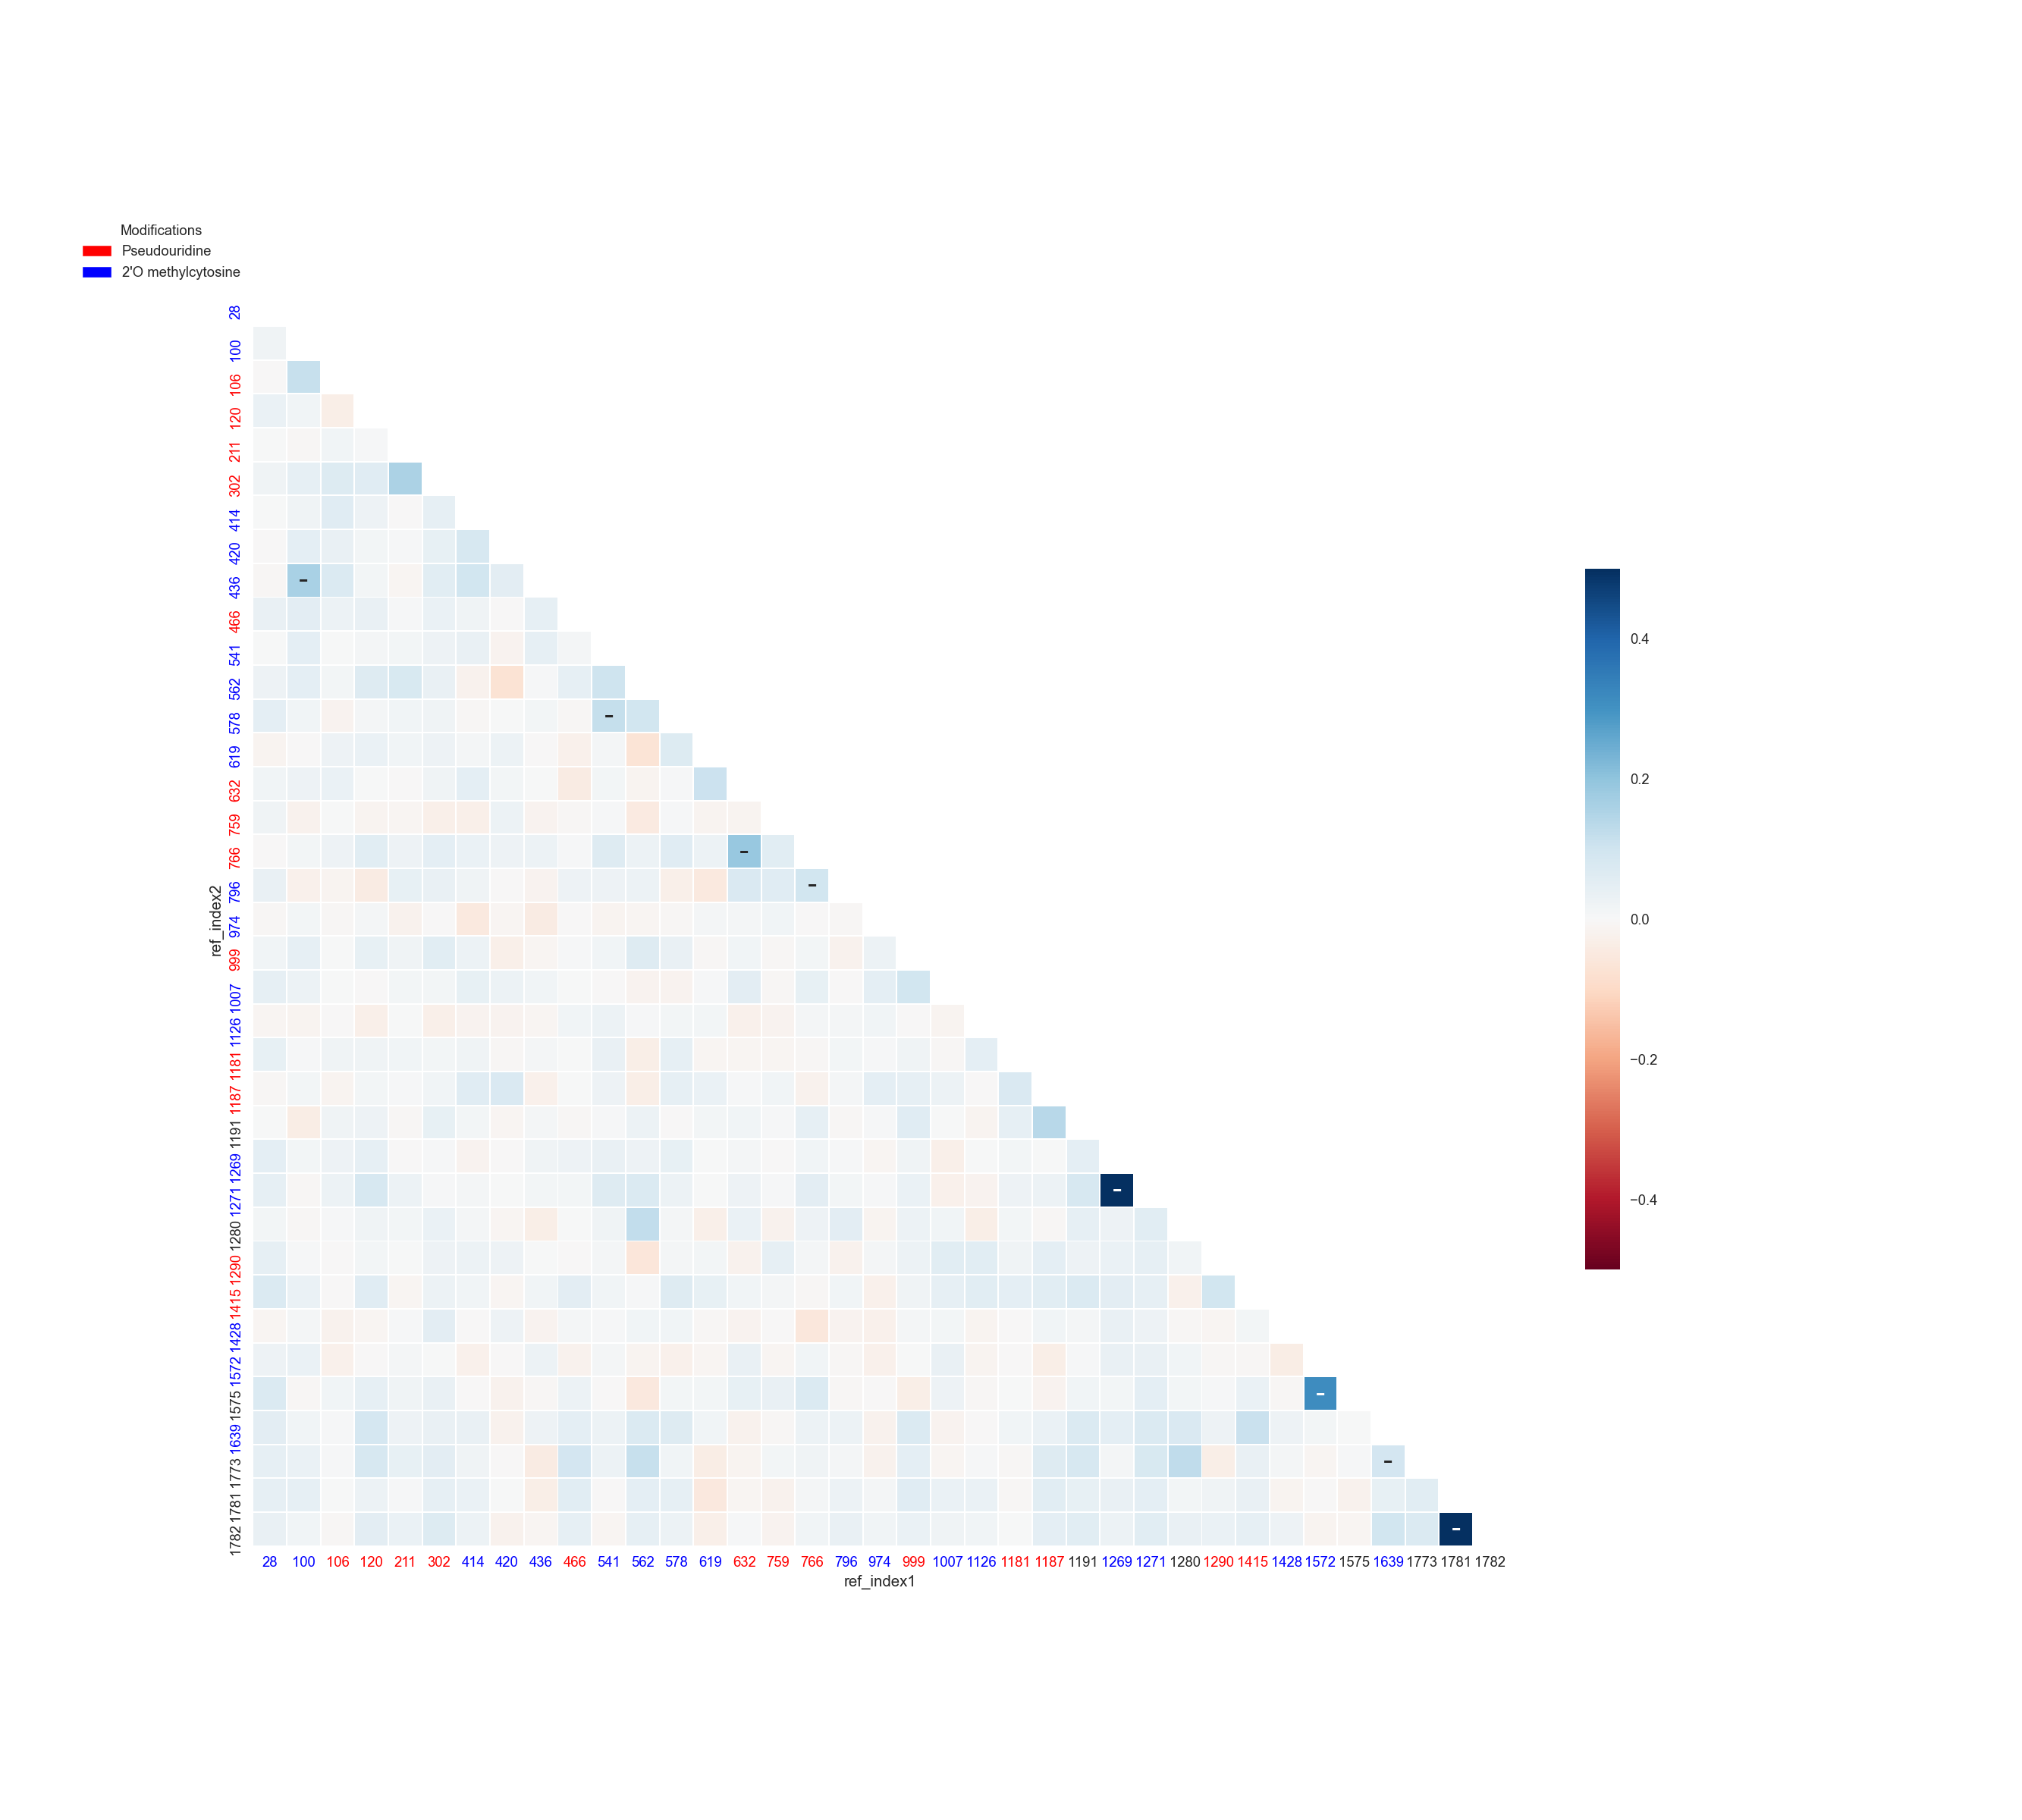

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<IPython.core.display.Javascript object>


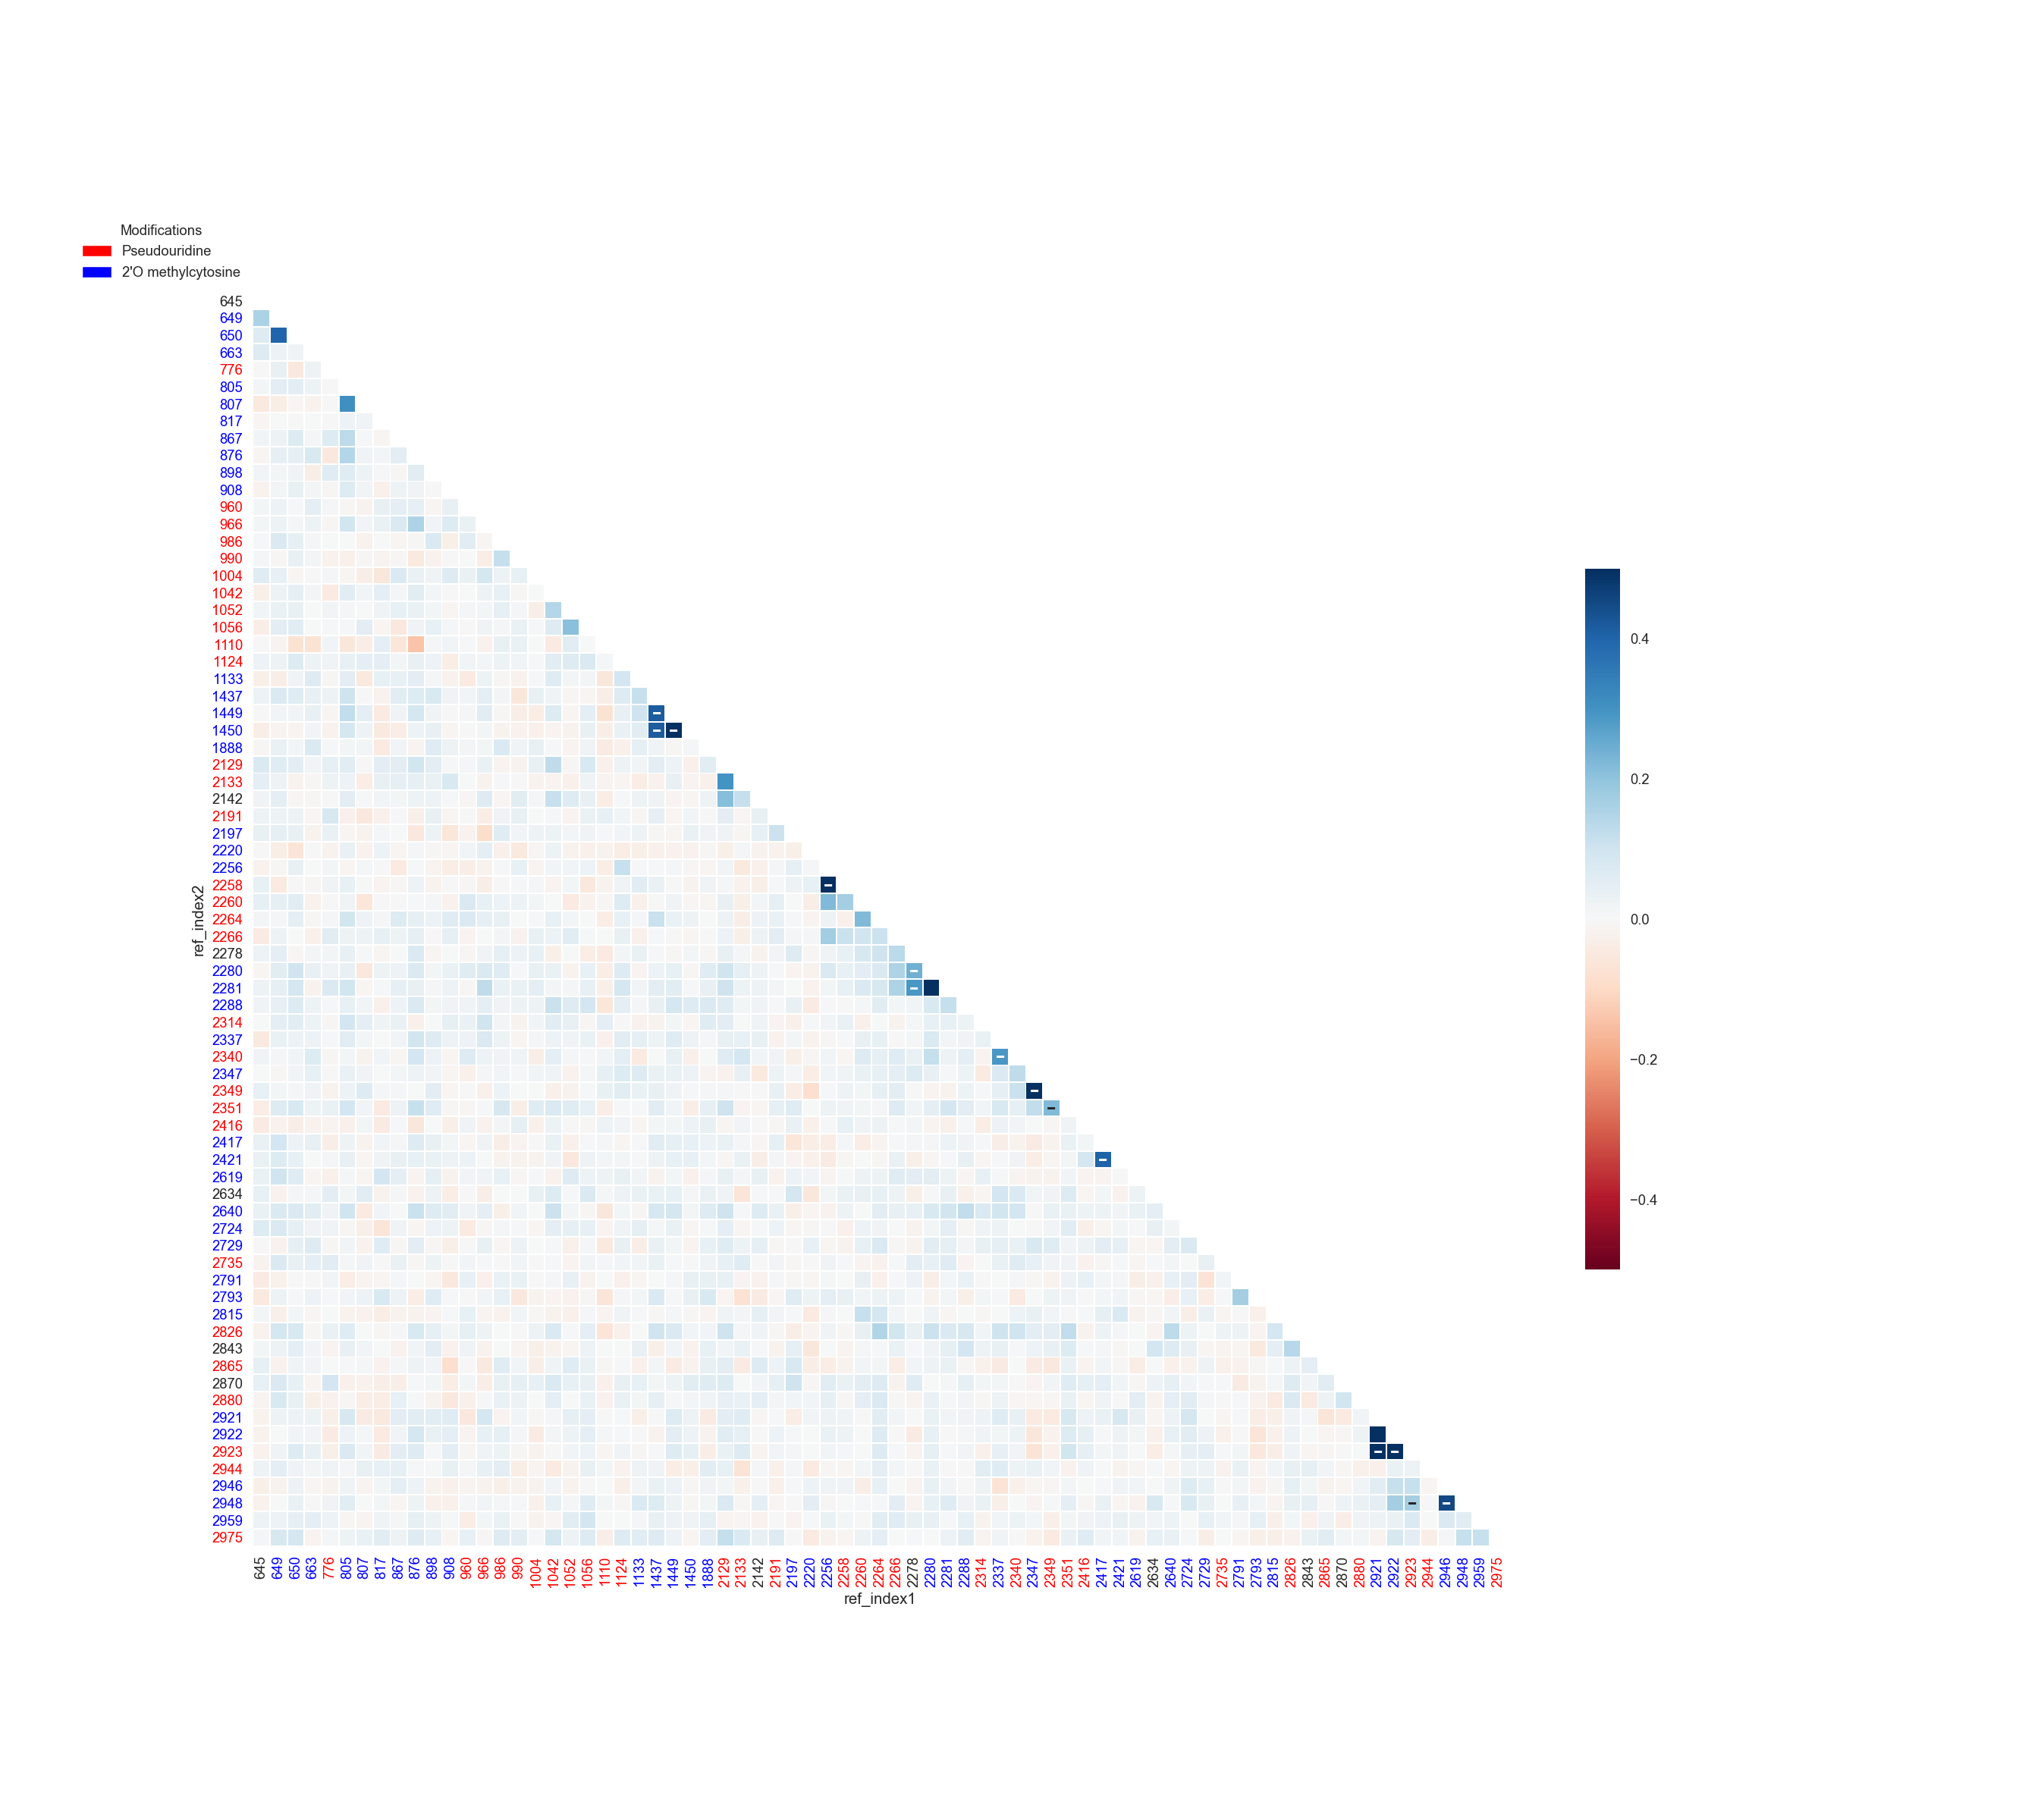

In [612]:

positive = False
negative = False
annotate = True
save_dir = None
norm2=None
linewidths=0.5

pvalue_cutoff = 0.01

positive = False
annotate = True
save_dir = False
plot_diff = True

# all_labels = ["CBF5GLU", "NOP58GLU"] 
# save_dir = f"figures/depletion_plots/"

# all_labels = ["dbr1d_YPD", "spp382_YPD", "prp16_18deg_YPD", "WT_PB"] 
# save_dir = f"figures/splicing_mutants/"

# all_labels = ["MIX_2"]  
# save_dir = f"figures/sno_rna_knockouts/"

# all_labels = ["sqs1d_YPD", "Dbp3d_YPD", "prp43"] 
# save_dir = f"figures/dbp3_prp43/"

# all_labels = ["WT_KOAC", "WT_CY", "WT_stationary", "WT_rapa5", "YS603_18_YEPD"] 
save_dir = f"figures/wt_ivt_environment_conditions/"
all_labels = ["WT_YPD"] 
plot_diff = False

for contig in ["RDN18-1", "RDN25-1"]:
    if contig == "RDN25-1":
        X = X_25
    else:
        X = X_18
    for label in all_labels:
        if save_dir:
            figure_path=os.path.join(save_dir, f"{label}_{contig}_{compare}_correlations.png")

            
#         label_X = X.xs(label, level="label")
#         d_stats = vc.get_correlation(label_X, "spearman")
#         wt_X = X.xs(compare, level="label")

#         d_stats2 = vc.get_correlation(wt_X, "spearman")
#         d_stats = d_stats - d_stats2

        contig_data = correlation_data[correlation_data["contig"]==contig]
        if plot_diff:
            vmax=0.5
            vmin=-0.5 
            cmap="RdBu"
            y = contig_data[f"{label}_corr"] - contig_data[f"{compare}_corr"] 
        else:
            y = contig_data[f"{label}_corr"]
            vmax=0.5
            vmin=-0.5 
            cmap="RdBu"

            
        d_stats = contig_data[["ref_index1", "ref_index2"]]
        d_stats["diff"] = y
        d_stats = pd.concat([d_stats.rename(columns={"ref_index2": "ref_index1", "ref_index1": "ref_index2"}), 
                             d_stats[["ref_index2", "ref_index1", "diff"]]]).reset_index()
        d_stats = d_stats.set_index(["ref_index2", "ref_index1"]).unstack(level=1)
        d_stats = d_stats["diff"]

        significant = correlation_data[(correlation_data[f"{label}_{compare}_pvalue"] < pvalue_cutoff) &
                                      (correlation_data[f"contig"] == contig)]

        if positive:
            sig_mask = \
            (correlation_data[f"{label}_{compare}_pvalue"] < pvalue_cutoff) & \
            (correlation_data[f"contig"] == contig) & \
            (y > 0) & (correlation_data[f"{label}_corrected_pvalue"] < pvalue_cutoff)
        elif negative:
            sig_mask = \
            (correlation_data[f"{label}_{compare}_pvalue"] < pvalue_cutoff) & \
            (correlation_data[f"contig"] == contig) & \
            (y < 0) & (correlation_data[f"{label}_corrected_pvalue"] < pvalue_cutoff)
        else:
            sig_mask = \
            (correlation_data[f"{label}_{compare}_pvalue"] < pvalue_cutoff) & \
            (correlation_data[f"contig"] == contig) & (correlation_data[f"{label}_corrected_pvalue"] < pvalue_cutoff)
            
        significant = correlation_data[sig_mask]

        annot = pd.DataFrame("", index=d_stats.index, columns=d_stats.columns)
        if annotate:
            for i, x in significant.iterrows():
                annot.loc[x.ref_index2, x.ref_index1] = "-"

        mask = np.triu(np.ones_like(d_stats, dtype=bool))
        f, ax = plt.subplots(figsize=(20, 18))
        # Draw the heatmap with the mask and correct aspect ratio
        ax = sns.heatmap(d_stats, annot=annot, mask=mask, cmap=cmap, yticklabels=True, xticklabels=True,
                         square=True, linewidths=linewidths, cbar_kws={"shrink": .5}, norm=norm2, vmax=vmax,
                         vmin=vmin, fmt="", annot_kws={"fontsize":20, "verticalalignment":"top"}, linecolor='white')  # vmax

        [t.set_color('red') for t in ax.xaxis.get_ticklabels() if
         int(re.search(r'\d+', t.get_text()).group()) in [x+1 for x in pseduo_u_pos]]
        [t.set_color('blue') for t in ax.xaxis.get_ticklabels() if
         int(re.search(r'\d+', t.get_text()).group()) in [x+1 for x in twoprimeo_pos]]
        [t.set_color('red') for t in ax.yaxis.get_ticklabels() if
         int(re.search(r'\d+', t.get_text()).group()) in [x+1 for x in pseduo_u_pos]]
        [t.set_color('blue') for t in ax.yaxis.get_ticklabels() if
         int(re.search(r'\d+', t.get_text()).group()) in [x+1 for x in twoprimeo_pos]]
        ax.set_xticks(ax.get_yticks())
        ax.set_xticklabels([int(x.get_text()) for x in ax.get_yticklabels()])
        ax.set_yticks(ax.get_xticks())
        ax.set_yticklabels(ax.get_xticklabels())

        #         experiment_labels = []
        #         for experiment, color in self.color_map.items():
        #             red_patch = mpatches.Patch(color=color, label=experiment)
        #             experiment_labels.append(red_patch)

        red_pseudoU = mpatches.Patch(color="red", label="Pseudouridine")
        blue_twoprime = mpatches.Patch(color="blue", label="2'O methylcytosine")
        plt.legend(handles=[red_pseudoU, blue_twoprime], bbox_to_anchor=(0, 1), loc='lower right',
                   title="Modifications")
        if figure_path is not None:
            plt.savefig(figure_path, dpi=200)
        else:
            plt.show()


In [559]:
annot.loc[significant["ref_index2"], significant["ref_index1"]] = "-"
annot.loc[significant["ref_index2"], significant["ref_index1"]]

ref_index1,2280,2921,2922
ref_index2,,,
2281,-,-,-
2922,-,-,-
2923,-,-,-


In [556]:
significant

,ref_index1,ref_index2,contig,CBF5GAL_corr,CBF5GAL_pvalue,CBF5GLU_corr,CBF5GLU_pvalue,NOP58GAL_corr,NOP58GAL_pvalue,NOP58GLU_corr,...,YS603_18_YEPD_WT_YPD_pvalue,prp16_18deg_YPD_WT_YPD_pvalue,spp382_YPD_WT_YPD_pvalue,R941_YS602_18_YPD_WT_YPD_pvalue,dbr1d_YPD_WT_YPD_pvalue,sqs1d_YPD_WT_YPD_pvalue,snR4d_YPD_WT_YPD_pvalue,snR45d_YPD_WT_YPD_pvalue,mutant448_2_WT_YPD_pvalue,snR4d_alpha_YPD_WT_YPD_pvalue
2733,2280,2281,RDN25-1,0.642404,5.100769e-14,0.607826,7.694694e-54,0.661759,1.128782e-24,0.523429,...,7.059551e-04,4.653486e-06,2.813117e-02,1.403157e-11,8.869115e-01,4.993634e-04,0.000106,7.363399e-01,9.780189e-04,1.858097e-19
3266,2921,2922,RDN25-1,1.000000,0.000000e+00,0.849578,5.136774e-146,0.574181,1.291226e-17,0.690832,...,1.978109e-21,2.420968e-09,8.312164e-01,9.293778e-04,8.869115e-01,2.657664e-03,0.009434,1.505447e-16,4.102028e-31,8.744191e-01
3273,2922,2923,RDN25-1,0.561123,2.203608e-10,0.705309,1.987391e-79,0.437359,4.822512e-10,0.801446,...,1.016343e-01,2.778503e-30,4.043391e-51,2.859291e-14,2.266521e-13,3.780142e-16,0.000628,9.594274e-01,4.679190e-11,3.615017e-18


In [564]:
for i, x in significant.iterrows():
    annot.loc[x.ref_index2, x.ref_index1] = "-"

2280
2921
2922


In [ ]:
%matplotlib notebook
contig = "RDN25-1"
# figure_path = f"figures/splicing_mutants/{contig}_splicing_mutations_bargraph.png"
figure_path=None

title = contig
pvalue_cutoff = 0.01
mod_threshold = 0
fig, axs = plt.subplots(1, figsize=(40, 10))
axs.set_title(title, fontdict={'fontsize':20})
width = 0.8 / len(all_labels)
tab_colors = ['tab:blue', 'tab:green', 'tab:purple', 'tab:orange', 'tab:red', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for i, label in enumerate(all_labels):
    mask = (correlation_data["contig"] == contig).values
    y = correlation_data[f"{label}_corr"] - correlation_data[f"{compare}_corr"] 
    pvalue_mask = (correlation_data[f"{label}_{compare}_pvalue"] < pvalue_cutoff)   
#     colors = pd.DataFrame(["b" if x else "r" for x in pvalue_mask])
    colors = pd.DataFrame([tab_colors[i] for x in pvalue_mask])
    x = y[mask].index
    y = y[mask]
    c = list(colors[mask][0].values)

    if i == 0:
        x1 = np.array(range(len(x)))+(0.5*width)
    if i == 1:
        x1 = np.array(range(len(x)))-(0.5*width)
    if i == 2:
        x1 = np.array(range(len(x)))+(1.5*width)
    if i == 3:
        x1 = np.array(range(len(x)))-(1.5*width)
    if i == 4:
        x1 = np.array(range(len(x)))+(2.5*width)
    if i == 5:
        x1 = np.array(range(len(x)))-(3.5*width)
    if i == 6:
        x1 = np.array(range(len(x)))+(4.5*width)


    axs.bar(x1, y, width, label=label, color=tab_colors[i])
    axs.scatter(x1[pvalue_mask[mask]], y[pvalue_mask&mask] + (np.sign(y[pvalue_mask&mask]) * 0.015), marker="*", color="black", zorder=10, s=250)
    axs.set_xticks(ticks=[x for x in range(len(x))], minor=True)
    axs.set_xticks(ticks=[x-0.5 for x in range(len(x)+1)], minor=False)

    axs.set_yticks(ticks=np.linspace(-1, 1, num=21, endpoint=True))

    axs.set_xticklabels(labels=x, minor=True)
    axs.set_xticklabels(labels=["" for x in x], minor=False)

#     axs.grid(True, which='minor', axis='x')
    axs.grid(True, which='major')

axs.set_ylim(-1, 1)
# plt.legend()

if figure_path is not None:
    plt.savefig(figure_path)
else:
    plt.show()

In [227]:
np.std((correlations_list[0] - correlations_list[1])).sort_values()

reference_index
2842    0.062296
1109    0.062513
2864    0.063510
2728    0.063555
2196    0.064223
          ...   
644     0.090925
804     0.092061
1436    0.100986
2921    0.106684
2920    0.127203
Length: 73, dtype: float64

In [218]:
np.max((correlations2_list[0] - correlations2_list[1])).sort_values(ascending=False)

reference_index
1781    0.223149
1186    0.223149
1190    0.194682
765     0.194682
413     0.190326
27      0.190326
631     0.189779
1006    0.189779
1772    0.184137
998     0.184137
1279    0.176435
119     0.176435
105     0.160150
435     0.160150
465     0.148141
419     0.143123
561     0.143123
1270    0.139406
210     0.139406
1414    0.135516
1427    0.133739
1780    0.133739
1574    0.128529
540     0.128016
758     0.127095
1125    0.127095
1180    0.126542
577     0.125752
301     0.125310
1571    0.125310
1289    0.123601
1268    0.118518
618     0.117174
795     0.113487
1638    0.104871
99      0.097567
973     0.097406
dtype: float64

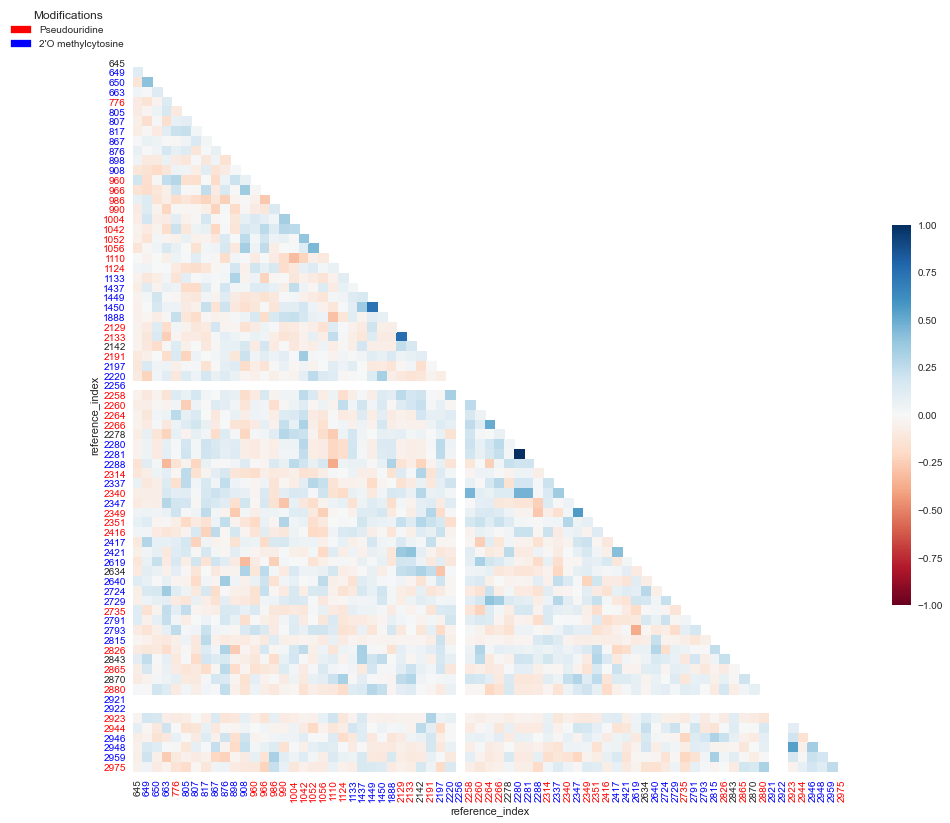

reference_index,644,648,649,662,775,804,806,816,866,875,...,2869,2879,2920,2921,2922,2943,2945,2947,2958,2974
reference_index,,,,,,,,,,,,,,,,,,,,,
644,1.000000,0.119805,-0.126460,0.033556,-0.085404,-0.082306,-0.061133,-0.075489,-0.001923,0.072157,...,-0.082087,0.010898,NaN,NaN,-0.027395,0.094362,-0.064704,-0.048756,-0.061006,-0.044210
648,0.119805,1.000000,0.407257,0.014869,-0.135752,-0.027178,-0.170519,-0.013509,0.062620,-0.006094,...,-0.040937,-0.005414,NaN,NaN,0.183045,-0.020649,-0.043007,0.163551,0.203933,0.042790
649,-0.126460,0.407257,1.000000,0.130586,-0.046874,0.050271,0.016987,-0.086941,0.046956,0.041791,...,0.027072,0.191630,NaN,NaN,0.164994,-0.103118,-0.147669,0.117629,-0.058031,-0.081251
662,0.033556,0.014869,0.130586,1.000000,0.129531,0.169718,-0.164542,0.113059,-0.006437,0.172256,...,0.053465,0.139245,NaN,NaN,-0.068224,0.209605,-0.107884,0.009687,-0.252221,-0.041947
775,-0.085404,-0.135752,-0.046874,0.129531,1.000000,-0.099916,0.081880,0.223098,-0.014364,0.088132,...,0.099596,-0.089233,NaN,NaN,-0.085396,-0.001732,0.080814,-0.008570,-0.097656,-0.137814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,0.094362,-0.020649,-0.103118,0.209605,-0.001732,-0.147510,-0.128439,0.085866,-0.107554,-0.008708,...,-0.002032,0.161352,NaN,NaN,0.109369,1.000000,-0.155600,-0.058786,-0.009286,0.090316
2945,-0.064704,-0.043007,-0.147669,-0.107884,0.080814,-0.003262,-0.080338,0.126718,-0.050276,0.209923,...,-0.093124,0.100811,NaN,NaN,0.197545,-0.155600,1.000000,0.344521,0.223397,0.184712
2947,-0.048756,0.163551,0.117629,0.009687,-0.008570,-0.121989,0.092836,0.008979,0.241747,-0.041213,...,0.002662,0.091800,NaN,NaN,0.552736,-0.058786,0.344521,1.000000,0.182661,0.120568


In [124]:
vc._plot_ld_heatmap(exp_x, vmax=1, vmin=-1, stat="spearman")

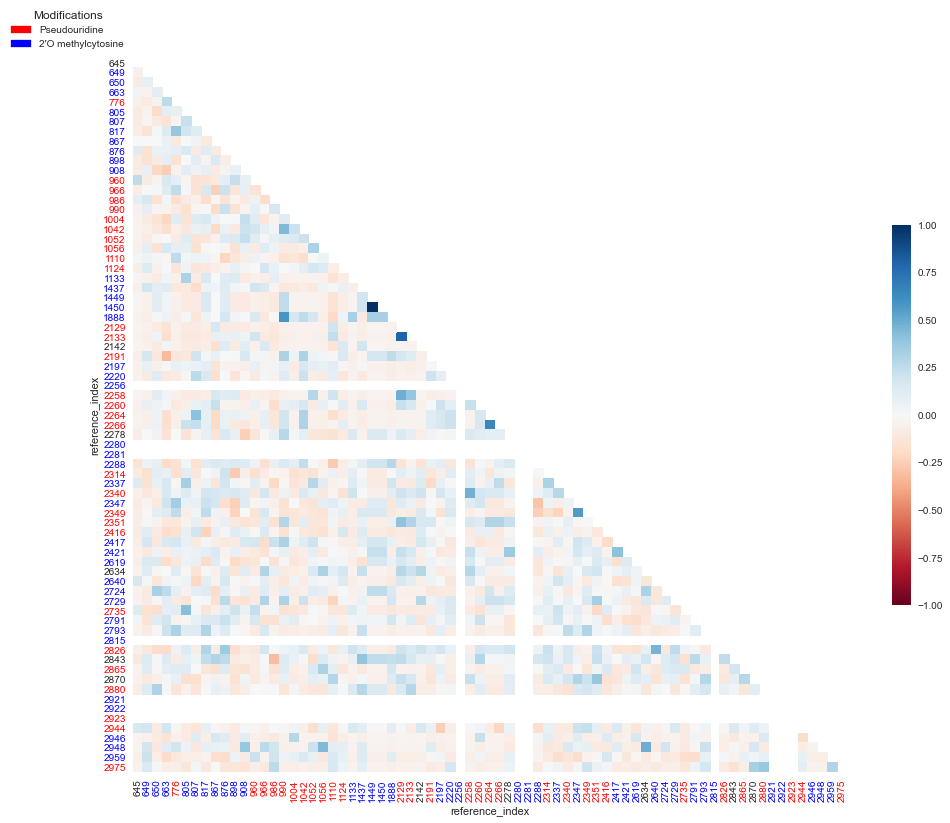

reference_index,644,648,649,662,775,804,806,816,866,875,...,2869,2879,2920,2921,2922,2943,2945,2947,2958,2974
reference_index,,,,,,,,,,,,,,,,,,,,,
644,1.000000,-0.048810,-0.086196,0.033787,-0.048810,-0.086196,-0.082761,-0.075793,0.002207,0.124141,...,-0.053107,-0.072239,NaN,NaN,NaN,0.159028,-0.027397,-0.033787,-0.057195,-0.039287
648,-0.048810,1.000000,0.086379,-0.040129,-0.086957,-0.033592,-0.024574,-0.135029,0.003932,-0.147442,...,-0.094612,0.139423,NaN,NaN,NaN,0.184942,-0.048810,0.190611,0.216530,0.148734
649,-0.086196,0.086379,1.000000,0.106299,-0.033592,-0.191737,-0.097642,0.019489,0.006944,0.065094,...,-0.055197,0.305403,NaN,NaN,NaN,-0.085994,-0.086196,-0.106299,-0.074509,0.021245
662,0.033787,-0.040129,0.106299,1.000000,0.260836,0.106299,-0.136083,0.129419,0.065326,0.068041,...,0.018712,0.014848,NaN,NaN,NaN,0.185221,-0.135147,0.111111,-0.193970,-0.072675
775,-0.048810,-0.086957,-0.033592,0.260836,1.000000,0.086379,-0.024574,0.384313,-0.094371,0.098295,...,0.074338,-0.128698,NaN,NaN,NaN,-0.011805,-0.048810,0.190611,-0.101896,-0.069993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,0.159028,0.184942,-0.085994,0.185221,-0.011805,-0.085994,-0.120096,0.087424,-0.012811,-0.053376,...,0.124771,0.055326,NaN,NaN,NaN,1.000000,-0.172280,-0.076267,0.072623,0.109271
2945,-0.027397,-0.048810,-0.086196,-0.135147,-0.048810,-0.086196,0.124141,-0.075793,0.167743,0.124141,...,-0.053107,0.153509,NaN,NaN,NaN,-0.172280,1.000000,-0.033787,-0.057195,-0.039287
2947,-0.033787,0.190611,-0.106299,0.111111,0.190611,0.059793,-0.102062,0.086280,0.070769,0.068041,...,0.168408,-0.089087,NaN,NaN,NaN,-0.076267,-0.033787,1.000000,-0.070535,-0.048450


In [126]:
vc._plot_ld_heatmap(values2, vmax=1, vmin=-1, stat="spearman")

In [93]:
all_labels[1:]

['wt4', 'wt6', 'wt10']

In [200]:
diff = {}
all_data = []
for contig in ["RDN25-1", "RDN18-1"]:
#     contig = "RDN25-1"
    X = vc.get_X(contig, vc.get_contig_positions(contig))
    for i, label1 in enumerate(all_labels):
        percent_mod = (X.xs(label1, level="label") >= 0.5).mean()
        for label2 in all_labels[1+i:]:
            percent_mod2 = (X.xs(label2, level="label") >= 0.5).mean()
            diff[f"{label1}_{label2}_{contig}"] = percent_mod - percent_mod2
            all_data.extend(list((percent_mod - percent_mod2).values))
all_data = pd.DataFrame(all_data)
diff = pd.DataFrame(diff)

In [201]:
sorted_data = np.abs(pd.DataFrame(all_data)).sort_values(by=0)

In [202]:
diff

,wt3_wt4_RDN25-1,wt3_wt6_RDN25-1,wt3_wt10_RDN25-1,wt4_wt6_RDN25-1,wt4_wt10_RDN25-1,wt6_wt10_RDN25-1,wt3_wt4_RDN18-1,wt3_wt6_RDN18-1,wt3_wt10_RDN18-1,wt4_wt6_RDN18-1,wt4_wt10_RDN18-1,wt6_wt10_RDN18-1
reference_index,,,,,,,,,,,,
27,NaN,NaN,NaN,NaN,NaN,NaN,-0.018487,-0.029353,-0.020102,-0.010865,-0.001614,0.009251
99,NaN,NaN,NaN,NaN,NaN,NaN,0.024385,0.039327,-0.000194,0.014942,-0.024579,-0.039521
105,NaN,NaN,NaN,NaN,NaN,NaN,-0.069646,-0.047812,-0.011509,0.021834,0.058136,0.036303
119,NaN,NaN,NaN,NaN,NaN,NaN,0.005918,-0.073946,-0.109565,-0.079863,-0.115482,-0.035619
210,NaN,NaN,NaN,NaN,NaN,NaN,-0.008717,-0.040133,0.004923,-0.031416,0.013640,0.045056
...,...,...,...,...,...,...,...,...,...,...,...,...
2943,0.154711,0.065954,0.176672,-0.088757,0.021961,0.110717,NaN,NaN,NaN,NaN,NaN,NaN
2945,-0.038398,-0.017947,-0.058791,0.020452,-0.020392,-0.040844,NaN,NaN,NaN,NaN,NaN,NaN
2947,-0.004609,-0.002227,0.004018,0.002383,0.008627,0.006245,NaN,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a209d2510>]],
      dtype=object)

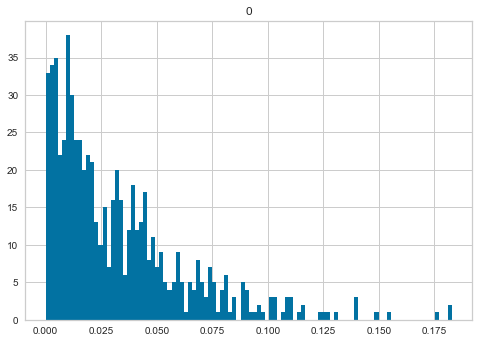

In [97]:
sorted_data.hist(bins=100)

In [113]:
def get_emperical_p(x, sorted_data):
    median = np.median(sorted_data)
    x = np.abs(x)
    n = len(all_data)
    pvalue = (np.sum(sorted_data >= x) / n)
    return float(pvalue)

In [183]:
p_value_threshold = 0.05
for x in np.linspace(0,0.2,200):
    p = get_emperical_p(x, sorted_data)
    if p < 0.05:
        print(x)
        break

0.09246231155778896


In [4]:
all_file_paths = [CBF5GAL, CBF5GLU, NOP58GAL, NOP58GLU, IVT, mutant448, WT_YPD, WT_KOAC, mutant452, WT_CY, mutant451, WT_PB, WT_stationary, Dbp3d_YPD, trl1d_YPD, WT_rapa5, Mix, prp43, MIX_2, YS603_18_YEPD, prp16_18deg_YPD, spp382_YPD, R941_YS602_18_YPD, dbr1d_YPD, sqs1d_YPD, snR4d_YPD, snR45d_YPD, mutant448_2, snR4d_alpha_YPD] 
all_labels = ["CBF5GAL", "CBF5GLU", "NOP58GAL", "NOP58GLU", "IVT", "mutant448", "WT_YPD", "WT_KOAC", "mutant452", "WT_CY", "mutant451", "WT_PB", "WT_stationary", "Dbp3d_YPD", "trl1d_YPD", "WT_rapa5", "Mix", "prp43", "MIX_2", "YS603_18_YEPD", "prp16_18deg_YPD", "spp382_YPD", "R941_YS602_18_YPD", "dbr1d_YPD", "sqs1d_YPD", "snR4d_YPD", "snR45d_YPD", "mutant448_2", "snR4d_alpha_YPD"] 
vc = VariantCalls(all_file_paths, all_labels, color_map="tab20")



In [ ]:
all_file_paths = [mutant448, mutant448_2] 
all_labels = ["mutant448", "mutant448_2"]  
all_file_paths = [snR4d_YPD, WT_YPD] 
all_labels = ["snR4d_YPD", "WT_YPD"]  


In [13]:
correlation_data = pd.read_csv("figures/summary_data/all_experiment_correlations_corrected_pvalues.csv")


0       False
1       False
2       False
3       False
4       False
        ...  
3289    False
3290    False
3291    False
3292    False
3293    False
Name: mutant448_corrected_pvalue, Length: 3294, dtype: bool

In [26]:
threshold = 0.05
mask = (correlation_data["mutant448_corrected_pvalue"] < threshold) & (correlation_data["mutant448_2_corrected_pvalue"] < threshold)

In [80]:
diff = np.abs((correlation_data["mutant448_corr"] - correlation_data["mutant448_2_corr"]))[mask]

In [88]:
top_n = diff.sort_values(ascending=False)[:20]

In [91]:
for x in top_n.index:
    print(correlation_data.loc[x][["ref_index1", "ref_index2", "contig", "mutant448_corr", "mutant448_2_corr"]])

ref_index1                2921
ref_index2                2922
contig                 RDN25-1
mutant448_corr        0.703211
mutant448_2_corr   -0.00372438
Name: 3266, dtype: object
ref_index1                2921
ref_index2                2923
contig                 RDN25-1
mutant448_corr        0.491704
mutant448_2_corr   -0.00700018
Name: 3267, dtype: object
ref_index1              1437
ref_index2              1450
contig               RDN25-1
mutant448_corr      0.519167
mutant448_2_corr    0.202516
Name: 2070, dtype: object
ref_index1             1437
ref_index2             1449
contig              RDN25-1
mutant448_corr      0.58419
mutant448_2_corr    0.31358
Name: 2069, dtype: object
ref_index1               2278
ref_index2               2281
contig                RDN25-1
mutant448_corr       0.321067
mutant448_2_corr    0.0674299
Name: 2700, dtype: object
ref_index1              1449
ref_index2              1450
contig               RDN25-1
mutant448_corr      0.805816
mutant448

In [61]:
correlation_data.loc[730]

Unnamed: 0                                              730
ref_index1                                              645
ref_index2                                             2921
contig                                              RDN25-1
CBF5GAL_corr                                        0.31794
                                                    ...    
mutant448_2_corrected_wt_comparison_pvalue         0.983244
snR4d_alpha_YPD_corr                             -0.0141769
snR4d_alpha_YPD_pvalue                             0.584893
snR4d_alpha_YPD_corrected_pvalue                   0.818644
snR4d_alpha_YPD_corrected_wt_comparison_pvalue     0.999365
Name: 730, Length: 120, dtype: object

In [30]:
threshold = 0.05
mask = (correlation_data["snR4d_YPD_corrected_pvalue"] < threshold) & (correlation_data["WT_YPD_corrected_pvalue"] < threshold)

In [48]:
diff = np.abs((correlation_data["snR4d_YPD_corr"] - correlation_data["WT_YPD_corr"]))

In [49]:
np.max(diff)

0.2686150001290976

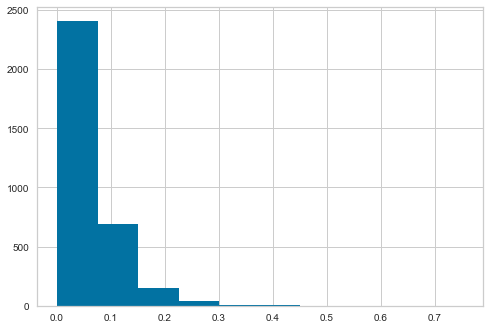

In [46]:
np.abs((correlation_data["CBF5GLU_corr"] - correlation_data["WT_YPD_corr"])) < 

In [38]:
for x in correlation_data.loc[1016]:
    print(x)

1016
805
807
RDN25-1
0.19053786814295712
0.04719339761222096
0.4479972672468468
0.8671477319886985
0.2921073806933949
1.092397421595147e-11
1.24081279542566e-09
0.9288172309926808
0.17394089574947086
0.017889571145308127
0.17434392707883126
0.6153928871201442
0.5730380586409209
1.2583984738581912e-82
4.60573841432098e-80
2.263541416380235e-12
0.3223748597441803
1.001276005019234e-16
5.497005267555594e-14
0.9371880076563172
0.3819199533687812
6.042334313228083e-11
1.2439655767358317e-08
0.841695562409805
0.3083740017275846
3.8459770271913667e-29
7.917905204730226e-27
1.0
0.3282555873058441
1.0694795837067355e-48
2.0722739698411686e-46
0.9806372357749332
0.3030968250006152
3.2800769514894594e-32
6.3556314577684e-30
0.9968476630209788
0.2067035385946392
1.647084870771867e-09
2.0867298324317426e-07
0.6144183160342332
0.2720590885756113
1.0953891759833592e-36
2.122477615111285e-34
0.9142162990244912
0.2549703699784398
4.0701925268399295e-37
7.44845232411707e-35
0.8635583614405222
0.03280836

In [6]:
corrected_pvalues_df = pd.read_csv("figures/summary_data/all_experiment_percent_modification_corrected_pvalues_chi2.csv", 
                                   index_col=0)


In [7]:
corrected_pvalues_df.is_nan()

AttributeError: 'DataFrame' object has no attribute 'is_nan'

In [1]:
corrected_pvalues_df = pd.read_csv("figures/summary_data/all_experiment_percent_modification_corrected_pvalues_chi2.csv", 
                                   index_col=0)

threshold = 0.01
for label in all_labels:
    mask = (corrected_pvalues_df["contig"] == "RDN18-1").values
    y = corrected_pvalues_df[f"{label}_mean"] - corrected_pvalues_df["WT_YPD_mean"] 
    pvalue_mask = (corrected_pvalues_df[f"{label}_corrected_pvalue"] < threshold) & (np.abs(y) > 0.1)   
    colors = pd.DataFrame(["b" if x else "r" for x in pvalue_mask])
    x_18S = y[mask].index
    y_18S = y[mask]
    c_18S = list(colors[mask][0].values)
    x_25S = y[~mask].index
    y_25S = y[~mask]
    c_25S = list(colors[~mask][0].values)
    plt.figure(figsize=(30,10))

    plt.subplot(211)
    plt.scatter(range(len(x_18S)), y_18S, c=c_18S, s=500)
    plt.xticks(ticks=range(len(x_18S)), labels=x_18S)
    plt.ylim(-1, 1)
    plt.title(label)

    plt.subplot(212)
    plt.scatter(range(len(x_25S)), y_25S, c=c_25S, s=300)
    plt.xticks(ticks=range(len(x_25S)), labels=x_25S)
    plt.ylim(-1, 1)

    plt.title(label, fontdict={'fontsize':20})
    
    plt.show()


NameError: name 'pd' is not defined

In [83]:
correlation_data = pd.read_csv("figures/summary_data/all_experiment_correlations_corrected_pvalues.csv")
twoprimeo_pvalues = []
other_pvalues = []
for index in range(len(corr)):
    data = corr.iloc[index]
    ref_index1 = data["ref_index1"]-1
    ref_index2 = data["ref_index2"]-1
    if ref_index1 in twoprimeo_pos and ref_index2 in twoprimeo_pos:
        twoprimeo_pvalues.append(correlation_data["NOP58GLU_corrected_wt_comparison_pvalue"].iloc[index])
    else:
        other_pvalues.append(correlation_data["NOP58GLU_corrected_wt_comparison_pvalue"].iloc[index])

statistic, pvalue = combine_pvalues(twoprimeo_pvalues)
print(statistic, pvalue)
statistic, pvalue = combine_pvalues(other_pvalues)
print(statistic, pvalue)

pseudou_pvalues = []
other_pvalues = []
for index in range(len(corr)):
    data = corr.iloc[index]
    ref_index1 = data["ref_index1"]-1
    ref_index2 = data["ref_index2"]-1
    if ref_index1 in pseduo_u_pos and ref_index2 in pseduo_u_pos:
        pseudou_pvalues.append(correlation_data["CBF5GLU_corrected_wt_comparison_pvalue"].iloc[index])
    else:
        other_pvalues.append(correlation_data["CBF5GLU_corrected_wt_comparison_pvalue"].iloc[index])

statistic, pvalue = combine_pvalues(pseudou_pvalues)
print(statistic, pvalue)
statistic, pvalue = combine_pvalues(other_pvalues)
print(statistic, pvalue)

In [84]:
statistic, pvalue = combine_pvalues(twoprimeo_pvalues)
print(statistic, pvalue)
statistic, pvalue = combine_pvalues(other_pvalues)
print(statistic, pvalue)

14397.563113979886 0.0
4545.713964554336 0.9999849487657706


In [85]:
pseudou_pvalues = []
other_pvalues = []
for index in range(len(corr)):
    data = corr.iloc[index]
    ref_index1 = data["ref_index1"]-1
    ref_index2 = data["ref_index2"]-1
    if ref_index1 in pseduo_u_pos and ref_index2 in pseduo_u_pos:
        pseudou_pvalues.append(correlation_data["CBF5GLU_corrected_wt_comparison_pvalue"].iloc[index])
    else:
        other_pvalues.append(correlation_data["CBF5GLU_corrected_wt_comparison_pvalue"].iloc[index])


In [86]:
statistic, pvalue = combine_pvalues(pseudou_pvalues)
print(statistic, pvalue)
statistic, pvalue = combine_pvalues(other_pvalues)
print(statistic, pvalue)

2616.795356503617 1.6401654564608985e-139
3181.443371800977 1.0


In [87]:
correlation_data.columns

Index(['Unnamed: 0', 'ref_index1', 'ref_index2', 'contig', 'CBF5GAL_corr',
       'CBF5GAL_pvalue', 'CBF5GAL_corrected_pvalue',
       'CBF5GAL_corrected_wt_comparison_pvalue', 'CBF5GLU_corr',
       'CBF5GLU_pvalue',
       ...
       'snR45d_YPD_corrected_pvalue',
       'snR45d_YPD_corrected_wt_comparison_pvalue', 'mutant448_2_corr',
       'mutant448_2_pvalue', 'mutant448_2_corrected_pvalue',
       'mutant448_2_corrected_wt_comparison_pvalue', 'snR4d_alpha_YPD_corr',
       'snR4d_alpha_YPD_pvalue', 'snR4d_alpha_YPD_corrected_pvalue',
       'snR4d_alpha_YPD_corrected_wt_comparison_pvalue'],
      dtype='object', length=120)

In [89]:
for x in all_labels:
    print(x, correlation_data[["ref_index1" ,"ref_index2", "contig", f"{x}_corrected_wt_comparison_pvalue", f"{x}_corr", "WT_YPD_corr"]][(correlation_data[f"{x}_corrected_wt_comparison_pvalue"] < 0.001) & (np.abs(correlation_data[f"{x}_corr"]) > 0.1) & (correlation_data[f"WT_YPD_corr"] < 0.3)])       

CBF5GAL Empty DataFrame
Columns: [ref_index1, ref_index2, contig, CBF5GAL_corrected_wt_comparison_pvalue, CBF5GAL_corr, WT_YPD_corr]
Index: []
CBF5GLU       ref_index1  ref_index2   contig  CBF5GLU_corrected_wt_comparison_pvalue  \
71           106         120  RDN18-1                            1.231746e-06   
72           106         211  RDN18-1                            4.417479e-06   
84           106         766  RDN18-1                            5.018434e-05   
90           106        1181  RDN18-1                            5.739806e-05   
92           106        1191  RDN18-1                            2.502495e-06   
...          ...         ...      ...                                     ...   
2486        2258        2264  RDN25-1                            8.839374e-08   
2521        2260        2264  RDN25-1                            8.414413e-04   
2594        2266        2314  RDN25-1                            3.027352e-04   
2622        2266        2975  RDN25-1  